# COMP5318 - Machine Learning and Data Mining: Assignment 1
#Team 139 
### Due: Friday week 7 - Fri 8 April 2022 11:59PM


# Import library and Import data

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/gdrive')


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier ##


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Input/train/train.csv') 
df_test = pd.read_csv('/content/gdrive/MyDrive/Input/test/test_input.csv')

# Data Understanding


There are 10 classes in total:    
- 0 T-shirt/Top    
- 1 Trouser    
- 2 Pullover    
- 3 Dress    
- 4 Coat    
- 5 Sandal    
- 6 Shirt    
- 7 Sneaker    
- 8 Bag    
- 9 Ankle boot

## Basic information about the data

In [ ]:
print("Train data information")
print(df_train.info())
print('Train data shape is', df_train.shape)
print("=========================")
print("Test data information")
print(df_test.info())
print('Test data shape is', df_test.shape)

Train data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 786 entries, id to label
dtypes: int64(786)
memory usage: 179.9 MB
None
Train data shape is (30000, 786)
Test data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, id to v784
dtypes: int64(785)
memory usage: 29.9 MB
None
Test data shape is (5000, 785)


Train data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 786 entries, id to label
dtypes: int64(786)
memory usage: 179.9 MB
None
Train data shape is (30000, 786)


Test data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, id to v784
dtypes: int64(785)
memory usage: 29.9 MB
None
Test data shape is (5000, 785)

## Print head

Print top 5 row in trainset

In [ ]:
df_train.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v776,v777,v778,v779,v780,v781,v782,v783,v784,label
0,0,0,0,0,0,1,0,0,131,184,...,143,106,0,0,0,0,0,0,0,2
1,1,0,0,0,0,0,0,0,0,27,...,190,178,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,1,0,0,0,1,1,...,1,0,9,66,61,0,0,0,0,4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


Print top 5 row in testset

In [ ]:
df_test.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v775,v776,v777,v778,v779,v780,v781,v782,v783,v784
0,0,0,0,0,0,0,0,0,0,0,...,88,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,17,...,124,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,35,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,9,75,...,74,53,19,0,1,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


## Plot the graph

In [ ]:
# Select the feature and label
df_train_feature = df_train.loc[:, "v1":"v784"].to_numpy()
df_train_label = df_train.label.to_numpy()
df_test_feature = df_test.loc[:, "v1":"v784"].to_numpy()
df_test_label = df_test['v1'].to_numpy()

Text(0.5, 1.0, 'Class 1')

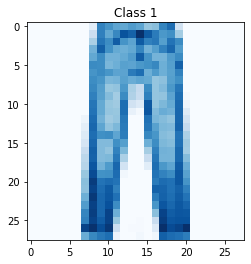

In [ ]:
# Print out the image from the trainning dataset
df_train_feature = df_train_feature.reshape((df_train_feature.shape[0],28,28))
plt.imshow(df_train_feature[1], cmap = plt.get_cmap('Blues'))
plt.title("Class " + str(df_train_label[1]))

Text(0.5, 1.0, 'Class 0')

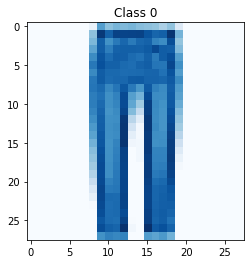

In [ ]:
# Print out the image from the testing dataset
df_test_feature = df_test_feature.reshape((df_test_feature.shape[0],28,28))
plt.imshow(df_test_feature[1], cmap = plt.get_cmap('Blues'))
plt.title("Class " + str(df_test_label[1]))

# Data cleanning

## Missing values check

In [ ]:
df = pd.concat([df_train,df_test], ignore_index=True)
df.isnull().sum().sort_values(ascending=True)
print("Train missing values:", df_train.isnull().any().sum())
print("Test missing values:", df_test.isnull().any().sum())

Train missing values: 0
Test missing values: 0


Train missing values: 0

Test missing values: 0

## Noise

In [ ]:
print("All the lebel in trainset are in type of "+ str(type(df_train['label'][1]))+" .")

All the lebel in trainset are in type of <class 'numpy.int64'> .


All the lebel in trainset are in type of <class 'numpy.int64'> .

## Class balance

In [ ]:
print("Category of the label", df_train['label'].unique())
print("Number of classification is", len(df_train['label'].unique()))

Category of the label [2 1 4 8 5 7 3 0 9 6]
Number of classification is 10


Category of the label [2 1 4 8 5 7 3 0 9 6]

Number of classification is 10

2    3036
3    3028
1    3026
7    3023
8    3007
6    3001
4    2985
0    2972
5    2967
9    2955
Name: label, dtype: int64
Each class has similar number of value


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


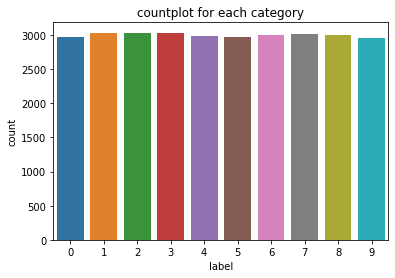

In [ ]:
print(df_train['label'].value_counts())
print("Each class has similar number of value")
Y_train = df_train["label"]
plt.title("countplot for each category")
sns.countplot(Y_train)

2    3036

3    3028

1    3026

7    3023

8    3007

6    3001

4    2985

0    2972

5    2967

9    2955

# Data preprocessing

Data Splitting 

In [ ]:
%%time
# split 28000 for train and last 2000 for test
X_train = df_train.drop('label', axis=1)[:28000]
y_train = df_train['label'][:28000]
X_test = df_train.drop('label', axis=1)[-2000:]
y_test = df_train['label'][-2000:]

CPU times: user 122 ms, sys: 171 ms, total: 293 ms
Wall time: 298 ms


CPU times: user 31.4 ms, sys: 33.1 ms, total: 64.5 ms
Wall time: 63.6 ms

Original data

In [ ]:
#Original data
sd_train=np.nanstd(X_train)
sd_test=np.nanstd(X_test)
print('Standard deviation of the train dataset: ', sd_train)
print('Standard deviation of the test dataset: ', sd_test)

Standard deviation of the train dataset:  581.4288141963353
Standard deviation of the test dataset:  1035.874263355892


Standard deviation of the train dataset:  581.4288141963353

Standard deviation of the test dataset:  1035.874263355892

Normalization

In [ ]:
# Normalization
X_train_norm = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test_norm = preprocessing.MinMaxScaler().fit_transform(X_test)
sd_nor_train=np.nanstd(X_train_norm)
sd_nor_test=np.nanstd(X_test_norm )
print('Standard deviation after normalization of the train dataset: ', sd_nor_train)
print('Standard deviation after normalization of the test dataset: ', sd_nor_test)

Standard deviation after normalization of the train dataset:  0.3526138592182334
Standard deviation after normalization of the test dataset:  0.3521153658576748


Standard deviation after normalization of the train dataset:  0.3526138592182334

Standard deviation after normalization of the test dataset:  0.3521153658576748

Standardization

In [ ]:
# Standardization
X_train_std =StandardScaler().fit_transform(X_train)
X_test_std =StandardScaler().fit_transform(X_test)
sdt_sta_train=np.nanstd(X_train_std )
sdt_sta_test=np.nanstd(X_test_std)
print('Standard deviation after standardization of the train dataset:', sdt_sta_train)
print('Standard deviation after standardization of the test dataset:', sdt_sta_test)

Standard deviation after standardization of the train dataset: 1.0
Standard deviation after standardization of the test dataset: 0.9993628543475495


Standard deviation after standardization of the train dataset: 1.0

Standard deviation after standardization of the test dataset: 0.9993628543475495

PCA (Principal Component Analysis)

In [ ]:
#fit by PCA method
pca = PCA(n_components=0.95).fit(X_train_std)
X_train_pca =pca.transform(X_train_std)
X_test_pca =pca.transform(X_test_std)

print("pca train data shape: {}".format(str(X_train_pca.shape)))
print("pca test data shape: {}".format(str(X_test_pca.shape)))

#check standard devication
sd_pca=np.nanstd(X_train_pca)
print('Standard devication: ', sd_pca)

pca train data shape: (28000, 255)
pca test data shape: (2000, 255)
Standard devication:  1.7103428860642826


pca train data shape: (28000, 255)

pca test data shape: (2000, 255)

Standard devication:  1.7103428860642826

Plot PCA

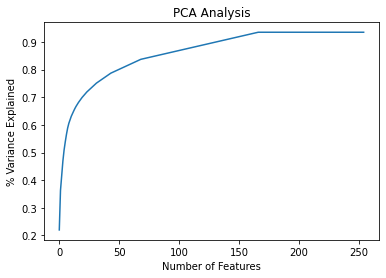

In [ ]:
#Explained variance ratio
#plot the chart
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))
#print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

# Implementation algorithms

## Navie Bayes

### Navie Bayes with orignal data

In [ ]:
%%time
navie_test = GaussianNB() 
navie_test.fit(X_train,y_train) 
y_pred_navie = navie_test.predict(X_test)
print("Testing accuracy: "+ str(accuracy_score(y_test, y_pred_navie)))

Testing accuracy: 0.608
CPU times: user 524 ms, sys: 23 ms, total: 547 ms
Wall time: 573 ms


Testing accuracy: 0.608
CPU times: user 524 ms, sys: 23 ms, total: 547 ms
Wall time: 573 ms

### Navie Bayes with Normalization data

In [ ]:
%%time
navie_test = GaussianNB() 
navie_test.fit(X_train_norm,y_train) 
y_pred_navie = navie_test.predict(X_test_norm)
print("Testing accuracy: "+ str(accuracy_score(y_test, y_pred_navie)))

Testing accuracy: 0.5835
CPU times: user 336 ms, sys: 21 ms, total: 357 ms
Wall time: 356 ms


Testing accuracy: 0.5835
CPU times: user 440 ms, sys: 21.2 ms, total: 461 ms
Wall time: 482 ms

### Navie Bayes with Standardization data

In [ ]:
%%time
navie_test = GaussianNB() 
navie_test.fit(X_train_std,y_train) 
y_pred_navie = navie_test.predict(X_test_std)
print("Testing accuracy: "+ str(accuracy_score(y_test, y_pred_navie)))

Testing accuracy: 0.25
CPU times: user 330 ms, sys: 22.1 ms, total: 352 ms
Wall time: 356 ms


Testing accuracy: 0.25
CPU times: user 431 ms, sys: 23.1 ms, total: 454 ms
Wall time: 482 ms

### Navie Bayes with PCA data

In [ ]:
%%time
navie_test = GaussianNB() 
navie_test.fit(X_train_pca,y_train) 
y_pred_navie = navie_test.predict(X_test_pca)
print("Testing accuracy: "+ str(accuracy_score(y_test, y_pred_navie)))

Testing accuracy: 0.579
CPU times: user 76.8 ms, sys: 10.9 ms, total: 87.7 ms
Wall time: 88.2 ms


Testing accuracy: 0.579
CPU times: user 76.8 ms, sys: 10.9 ms, total: 87.7 ms
Wall time: 88.2 ms

### Best Parameters seaching from GridSearch with Cross-validation

GridSearch with GaussianNB

In [ ]:
%%time
tune = {
'var_smoothing': np.logspace(0,-9, num=100)
}
GaNB = GridSearchCV(estimator=GaussianNB(), param_grid=tune, verbose=2, cv=5, n_jobs=-1) 
GaNB.fit(X_train, y_train)
print("Train set score: {:.2f}".format(GaNB.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(GaNB.score(X_test, y_test))) 
print("Best parameters: {}".format(GaNB.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train set score: 0.67
Test set score: 0.67
Best parameters: {'var_smoothing': 1.873817422860383e-05}
CPU times: user 4.47 s, sys: 400 ms, total: 4.87 s
Wall time: 2min 56s


Fitting 5 folds for each of 100 candidates, totalling 500 fits

Train set score: 0.67

Test set score: 0.67

Best parameters: {'var_smoothing': 1.873817422860383e-05}

CPU times: user 4.47 s, sys: 400 ms, total: 4.87 s

Wall time: 2min 56s

GridSearch with BernoulliNB

In [ ]:
%%time
tune = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

beNB = GridSearchCV(BernoulliNB(), param_grid=tune, n_jobs=-1, cv=5, verbose=5)
beNB.fit(X_train,y_train)

print('Train Accuracy : %.3f'%beNB.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%beNB.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',beNB.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.717
Test Accuracy : 0.691
Best Parameters :  {'alpha': 0.01}
CPU times: user 1.27 s, sys: 149 ms, total: 1.42 s
Wall time: 10.9 s


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Train Accuracy : 0.717

Test Accuracy : 0.691

Best Parameters :  {'alpha': 0.01}

CPU times: user 1.27 s, sys: 149 ms, total: 1.42 s

Wall time: 10.9 s

GridSearch with MultinomialNB

In [ ]:
%%time
tune = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

muNB = GridSearchCV(MultinomialNB(), param_grid=tune, n_jobs=-1, cv=5, verbose=5)
muNB.fit(X_train,y_train)

print('Train Accuracy : %.3f'%muNB.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%muNB.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',muNB.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.680
Test Accuracy : 0.653
Best Parameters :  {'alpha': 0.01}
CPU times: user 748 ms, sys: 226 ms, total: 974 ms
Wall time: 7.63 s


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Train Accuracy : 0.680

Test Accuracy : 0.653

Best Parameters :  {'alpha': 0.01}

CPU times: user 748 ms, sys: 226 ms, total: 974 ms

Wall time: 7.63 s

GridSearch with ComplementNB 

In [ ]:
%%time
tune = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

coNB = GridSearchCV(ComplementNB(), param_grid=tune, n_jobs=-1, cv=5, verbose=5)
coNB.fit(X_train,y_train)

print('Train Accuracy : %.3f'%coNB.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%coNB.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',coNB.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.609
Test Accuracy : 0.551
Best Parameters :  {'alpha': 0.01}
CPU times: user 749 ms, sys: 197 ms, total: 946 ms
Wall time: 7.65 s


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Train Accuracy : 0.609

Test Accuracy : 0.551

Best Parameters :  {'alpha': 0.01}

CPU times: user 749 ms, sys: 197 ms, total: 946 ms

Wall time: 7.65 s

### Best Parameters

In [ ]:
%%time
navie_test = BernoulliNB(alpha= 0.01) 
navie_test.fit(X_train,y_train) 
y_pred_navie = navie_test.predict(X_test)
print("Testing accuracy: "+ str(accuracy_score(y_test, y_pred_navie)))

Testing accuracy: 0.691
CPU times: user 845 ms, sys: 0 ns, total: 845 ms
Wall time: 864 ms


Testing accuracy: 0.691

CPU times: user 845 ms, sys: 0 ns, total: 845 ms

Wall time: 864 ms

## KNN


### KNN with orignal data

In [ ]:
%%time
baseNN = []
for i in range(10):
  
  if i <= 4:
    i+=1
     
  else:
      print("n = " + str(i))
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train, y_train)
      y_pred = knn.predict(X_test)
      result = metrics.accuracy_score(y_test, y_pred)
      print("Test accuracy: "+ str(result))
      print("===================================")
      baseNN.append(result)

most_acc = max(baseNN)
print("Best Accuracy for original data "+ str(most_acc))

avg_acc = sum(baseNN) / len(baseNN)
print("AVG ACC "+ str(avg_acc))

n = 5
Test accuracy: 0.721
n = 6
Test accuracy: 0.7315
n = 7
Test accuracy: 0.726
n = 8
Test accuracy: 0.734
n = 9
Test accuracy: 0.729
Best Accuracy for original data 0.734
AVG ACC 0.7283000000000001
CPU times: user 26.4 s, sys: 624 ms, total: 27 s
Wall time: 16.8 s


n = 5
Test accuracy: 0.721

n = 6
Test accuracy: 0.7315

n = 7
Test accuracy: 0.726

n = 8
Test accuracy: 0.734

n = 9
Test accuracy: 0.729

Best Accuracy for original data 0.734

AVG ACC 0.7283000000000001

CPU times: user 26.4 s, sys: 624 ms, total: 27 s

Wall time: 16.8 s

### KNN with Normalization data

In [ ]:
%%time
ndNN = []
for i in range(10):
  
  if i <= 4:
    i+=1
     
  else:
      print("n = " + str(i))
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train_norm, y_train)
      y_pred = knn.predict(X_test_norm)
      result = metrics.accuracy_score(y_test, y_pred)
      print("Test accuracy: "+ str(result))
      print("===================================")
      ndNN.append(result)

most_acc = max(ndNN)
print("Best Accuracy for normalized data "+ str(most_acc))

avg_acc = sum(ndNN) / len(ndNN)
print("AVG ACC "+ str(avg_acc))

n = 5
Test accuracy: 0.8475
n = 6
Test accuracy: 0.8455
n = 7
Test accuracy: 0.8425
n = 8
Test accuracy: 0.8405
n = 9
Test accuracy: 0.8405
Best Accuracy for normalized data 0.8475
AVG ACC 0.8432999999999999
CPU times: user 23.5 s, sys: 817 ms, total: 24.4 s
Wall time: 18.3 s


n = 5
Test accuracy: 0.8475

n = 6
Test accuracy: 0.8455

n = 7
Test accuracy: 0.8425

n = 8
Test accuracy: 0.8405

n = 9
Test accuracy: 0.8405

Best Accuracy for normalized data 0.8475

AVG ACC 0.8432999999999999

CPU times: user 23.5 s, sys: 817 ms, total: 24.4 s

Wall time: 18.3 s

### KNN with Standardization data

In [ ]:
%%time
sdNN = []
for i in range(10):
  
  if i <= 4:
    i+=1
     
  else:
      print("n = " + str(i))
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train_std, y_train)
      y_pred = knn.predict(X_test_std)
      result = metrics.accuracy_score(y_test, y_pred)
      print("Test accuracy: "+ str(result))
      print("===================================")
      sdNN.append(result)

most_acc = max(sdNN)
print("Best Accuracy for Standardization data "+ str(most_acc))

avg_acc = sum(sdNN) / len(sdNN)
print("AVG ACC "+ str(avg_acc))

n = 5
Test accuracy: 0.8405
n = 6
Test accuracy: 0.8405
n = 7
Test accuracy: 0.8435
n = 8
Test accuracy: 0.841
n = 9
Test accuracy: 0.845
Best Accuracy for Standardization data 0.845
AVG ACC 0.8421
CPU times: user 24 s, sys: 973 ms, total: 25 s
Wall time: 15.7 s


n = 5
Test accuracy: 0.8405

n = 6
Test accuracy: 0.8405

n = 7
Test accuracy: 0.8435

n = 8
Test accuracy: 0.841

n = 9
Test accuracy: 0.845

Best Accuracy for Standardization data 0.845

AVG ACC 0.8421

CPU times: user 24 s, sys: 973 ms, total: 25 s

Wall time: 15.7 s

### KNN with PCA data

In [ ]:
%%time
LRNN = []
for i in range(10):
  
  if i <= 4:
    i+=1
     
  else:
      print("n = " + str(i))
      knn = KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train_pca, y_train)
      y_pred = knn.predict(X_test_pca)
      result = metrics.accuracy_score(y_test, y_pred)
      print("Test accuracy: "+ str(result))
      print("===================================")
      LRNN.append(result)

most_acc = max(LRNN)
print("Best Accuracy for PCA data "+ str(most_acc))

avg_acc = sum(LRNN) / len(LRNN)
print("AVG ACC "+ str(avg_acc))

n = 5
Test accuracy: 0.8525
n = 6
Test accuracy: 0.8545
n = 7
Test accuracy: 0.848
n = 8
Test accuracy: 0.8545
n = 9
Test accuracy: 0.8515
Best Accuracy for PCA data 0.8545
AVG ACC 0.8522000000000001
CPU times: user 11.3 s, sys: 613 ms, total: 11.9 s
Wall time: 8.18 s


n = 5
Test accuracy: 0.8525

n = 6
Test accuracy: 0.8545

n = 7
Test accuracy: 0.848

n = 8
Test accuracy: 0.8545

n = 9
Test accuracy: 0.8515

Best Accuracy for PCA data 0.8545

AVG ACC 0.8522000000000001

CPU times: user 11.3 s, sys: 613 ms, total: 11.9 s

Wall time: 8.18 s

### Best Parameters seaching from GridSearch with Cross-validation

In [ ]:
%%time
k_range = list(range(5, 15))

knn_para = {'n_neighbors': k_range,}

knn_result = GridSearchCV(KNeighborsClassifier(algorithm='auto'), knn_para, cv=5, return_train_score=True, verbose =2, n_jobs = -1) 

knn_result.fit(X_train_pca, y_train)
print("Test set score: {:.2f}".format(knn_result .score(X_test_pca, y_test))) 
print("Train set score: {:.2f}".format(knn_result.score(X_train_pca, y_train))) 
print("Best parameters: {}".format(knn_result .best_params_))
print("Best estimator:\n{}".format(knn_result .best_estimator_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Test set score: 0.85
Train set score: 0.88
Best parameters: {'n_neighbors': 8}
Best estimator:
KNeighborsClassifier(n_neighbors=8)
CPU times: user 36.2 s, sys: 1.78 s, total: 37.9 s
Wall time: 10min 3s


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Test set score: 0.85

Train set score: 0.88

Best parameters: {'n_neighbors': 8}

Best estimator:
KNeighborsClassifier(n_neighbors=8)

CPU times: user 36.2 s, sys: 1.78 s, total: 37.9 s

Wall time: 10min 3s

### Best Parameters

In [ ]:
%%time
knn = KNeighborsClassifier(n_neighbors= 8)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
result = accuracy_score(y_test, y_pred)
print("Test accuracy: "+str(result))
print("Train accuracy: "+str(knn_result.score(X_train_pca, y_train)))

Test accuracy: 0.8545
Train accuracy: 0.8832857142857143
CPU times: user 33.6 s, sys: 1.13 s, total: 34.8 s
Wall time: 25.3 s


Test accuracy: 0.8545

Train accuracy: 0.8832857142857143

CPU times: user 33.6 s, sys: 1.13 s, total: 34.8 s

Wall time: 25.3 s

## Logistic Regression

### Basic model trainning (Normalization & Standardization & PCA) with Logistic Regression

In [ ]:
%%time
train_list = [X_train, X_train_std, X_train_norm, X_train_pca]
test_list = [X_test, X_test_std, X_test_norm, X_test_pca]

model = LogisticRegression(random_state=rs)
for i in range(len(train_list)):
  # fit it to training data
  model.fit(train_list[i], y_train)
  # predict using X_test
  y_pred = model.predict(test_list[i])
  # training and test accuracy
  print(i,"Train data Accuracy is :", model.score(train_list[i], y_train))
  print(i,"Test data Accuracy is :", model.score(test_list[i], y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0 Train data Accuracy is : 0.8111785714285714
0 Test data Accuracy is : 0.8105


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1 Train data Accuracy is : 0.8919285714285714
1 Test data Accuracy is : 0.835


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2 Train data Accuracy is : 0.8705
2 Test data Accuracy is : 0.8505


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3 Train data Accuracy is : 0.8695357142857143
3 Test data Accuracy is : 0.851
CPU times: user 2min 14s, sys: 27.5 s, total: 2min 41s
Wall time: 2min 28s


3 Train data Accuracy is : 0.8695357142857143

3 Test data Accuracy is : 0.851

CPU times: user 2min 14s, sys: 27.5 

Wall time: 2min 28s

### Best Parameters seaching from GridSearch with Cross-validation

In [ ]:
%%time
#using pca data
params_lr = {'C': [0.01, 0.1, 1 ],
             'penalty': ['l1','l2']}
cv_lr = GridSearchCV(param_grid=params_lr, estimator=LogisticRegression(random_state=rs),
                  return_train_score=True, cv=10, n_jobs=-1)
# use Standardization data
cv_lr.fit(X_train_pca, y_train)

print("Train accuracy from best hyperparmater:", cv_lr.score(X_train_pca, y_train))
print("Test accuracy from best hyperparmater:", cv_lr.score(X_test_pca, y_test))
y_pred_lr_grid = cv_lr.predict(X_test_pca)
print(classification_report(y_test, y_pred_lr_grid))
cv_lr.get_params()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

Train accuracy from best hyperparmater: 0.8652142857142857
Test accuracy from best hyperparmater: 0.8535
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       208
           1       0.98      0.96      0.97       194
           2       0.75      0.76      0.75       189
           3       0.83      0.87      0.85       196
           4       0.74      0.78      0.76       189
           5       0.96      0.90      0.93       205
           6       0.70      0.61      0.65       219
           7       0.91      0.94      0.92       199
           8       0.94      0.95      0.95       219
           9       0.91      0.95      0.93       182

    accuracy                           0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.85      0.85      0.85      2000

CPU times: user 16.2 s, sys: 3.87 s, total: 20 s
Wall time: 3min 20s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train accuracy from best hyperparmater: 0.8652142857142857
Test accuracy from best hyperparmater: 0.8535
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       208
           1       0.98      0.96      0.97       194
           2       0.75      0.76      0.75       189
           3       0.83      0.87      0.85       196
           4       0.74      0.78      0.76       189
           5       0.96      0.90      0.93       205
           6       0.70      0.61      0.65       219
           7       0.91      0.94      0.92       199
           8       0.94      0.95      0.95       219
           9       0.91      0.95      0.93       182

    accuracy                           0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.85      0.85      0.85      2000

CPU times: user 16.2 s, sys: 3.87 s, total: 20 s
Wall time: 3min 20s

In [ ]:
%%time
result_set = cv_lr.cv_results_
print("Best parameter of logistic regression is ",cv_lr.best_params_)
print("Best pefromance preprocessing method is Standardixation")

Best parameter of logistic regression is  {'C': 0.01, 'penalty': 'l2'}
Best pefromance preprocessing method is Standardixation
CPU times: user 2.24 ms, sys: 4.14 ms, total: 6.38 ms
Wall time: 7.22 ms


Best parameter of logistic 
regression is  {'C': 0.01, 'penalty': 'l2'}

Best pefromance preprocessing method is Standardixation

CPU times: user 2.24 ms, sys: 4.14 
ms, total: 6.38 ms

Wall time: 7.22 ms

### Best Parameters

In [ ]:
%%time
model = LogisticRegression(penalty='l2',C=0.01,random_state=42 )
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
print("Train data Accuracy is :", model.score(X_train_pca, y_train))


Train data Accuracy is : 0.8652142857142857
CPU times: user 12.5 s, sys: 4.55 s, total: 17 s
Wall time: 17.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train data Accuracy is : 0.8652142857142857


CPU times: user 12.5 s, sys: 4.55 s, total: 17 s

Wall time: 17.7 s

## Decision Tree

### Basic model trainning (Original & Normalization & Standardization & PCA) with Decission tree

In [ ]:
%%time
# simple decision tree training
train_list=[X_train, X_train_std, X_train_norm, X_train_pca]
test_list =[X_test, X_test_std, X_test_norm, X_test_pca]


model = DecisionTreeClassifier(random_state=rs)
for i in range(len(train_list)):
  # fit it to training data
  model.fit(train_list[i], y_train)
  # predict using X_test
  y_pred = model.predict(test_list[i])
  # training and test accuracy
  print(i+1,"Train data Accuracy is :", model.score(train_list[i], y_train))
  print(i+1,"Test data Accuracy is :", model.score(test_list[i], y_test))
  #print(classification_report(y_test, y_pred))

1 Train data Accuracy is : 1.0
1 Test data Accuracy is : 0.7825
2 Train data Accuracy is : 1.0
2 Test data Accuracy is : 0.7045
3 Train data Accuracy is : 1.0
3 Test data Accuracy is : 0.786
4 Train data Accuracy is : 1.0
4 Test data Accuracy is : 0.723
CPU times: user 1min 9s, sys: 83.5 ms, total: 1min 9s
Wall time: 1min 9s


1 Train data Accuracy is : 1.0

1 Test data Accuracy is : 0.7825


2 Train data Accuracy is : 1.0

2 Test data Accuracy is : 0.7045

3 Train data Accuracy is : 1.0

3 Test data Accuracy is : 0.786

4 Train data Accuracy is : 1.0

4 Test data Accuracy is : 0.723

CPU times: user 1min 9s, sys: 83.5 
ms, total: 1min 9s

Wall time: 1min 9s

### Best Parameters seaching from GridSearch with Cross-validation

Normalization data preprocessing shows the best performacne in decision tree


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# grid search CV
# finding the best pre-pruning depth
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(6, 12),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),
                    return_train_score=True,
                    cv=10)
cv_1.fit(X_train_norm, y_train) # data set necessary
y_pred_dt_grid = cv_1.predict(X_test_norm)
print("Train accuracy from best hyperparmater:", cv_1.score(X_train_norm, y_train))
print("Test accuracy from best hyperparmater:", cv_1.score(X_test_norm, y_test))
print(classification_report(y_test, y_pred_dt_grid))
print("Best parameters: {}".format(cv_1 .best_params_))
cv_1.get_params()

Train accuracy from best hyperparmater: 0.8738928571428571
Test accuracy from best hyperparmater: 0.7965
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       208
           1       0.91      0.92      0.92       194
           2       0.68      0.74      0.71       189
           3       0.79      0.80      0.79       196
           4       0.64      0.68      0.66       189
           5       0.93      0.87      0.90       205
           6       0.63      0.56      0.59       219
           7       0.86      0.86      0.86       199
           8       0.95      0.90      0.93       219
           9       0.84      0.90      0.87       182

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5}
CPU times: user 1h 25min 6s, sys: 5.73 s, total: 1h 25

Train accuracy from best hyperparmater: 0.8738928571428571
Test accuracy from best hyperparmater: 0.7965
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       208
           1       0.91      0.92      0.92       194
           2       0.68      0.74      0.71       189
           3       0.79      0.80      0.79       196
           4       0.64      0.68      0.66       189
           5       0.93      0.87      0.90       205
           6       0.63      0.56      0.59       219
           7       0.86      0.86      0.86       199
           8       0.95      0.90      0.93       219
           9       0.84      0.90      0.87       182

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 5}
CPU times: user 1h 25min 6s, sys: 5.73 s, total: 1h 25min 12s
Wall time: 1h 25min 51s

In [ ]:
result_set = cv_1.cv_results_

In [ ]:
%%time
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))


Total number of models:  48
CPU times: user 1.48 ms, sys: 4 µs, total: 1.49 ms
Wall time: 1.42 ms


Total number of models:  48

CPU times: user 1.48 ms, sys: 4 µs, total: 1.49 ms

Wall time: 1.42 ms

### The accuracy score between training accuracy and testing accuracy

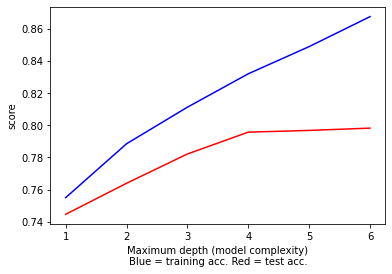

CPU times: user 169 ms, sys: 5 ms, total: 174 ms
Wall time: 180 ms


In [ ]:
%%time
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

Decision Tree with orignal data

In [ ]:
print(cv_1.best_estimator_.tree_.node_count)
print(cv_1.best_estimator_.get_n_leaves())

1183
592


1183

592

### Best Parameters

In [ ]:
%%time
rs =42
model = DecisionTreeClassifier(criterion='entropy', max_depth =11, 
                               min_samples_leaf= 5, random_state=rs)

model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print('Train data Accuracy is :', model.score(X_train_norm, y_train))
print('Test data Accuracy is :', model.score(X_test_norm, y_test))

Train data Accuracy is : 0.8738928571428571
Test data Accuracy is : 0.7965
CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 18.6 s


Train data Accuracy is : 0.8738928571428571


Test data Accuracy is : 0.7965

CPU times: user 18.3 s, sys: 0 ns, 
total: 18.3 s

Wall time: 18.6 s

## SVM (Support Vector Machine)

Set random_state as 42.

In [ ]:
rs = 42

### Basic model trainning (Normalization & Standardization & PCA) with liner kernel type

In [ ]:
%%time
train_list = [X_train_std, X_train_norm, X_train_pca]
test_list = [X_test_std, X_test_norm, X_test_pca]
#kernel_type = ['linear', 'poly', 'rbf','sigmoid']

for i in range(len(train_list)):
  model = SVC(kernel= 'linear', random_state=rs)
  model.fit(train_list[i], y_train)
  #predict using X_test
  y_pred = model.predict(test_list[i])
  #print result
  print(i,'st Train accuracy',model.score(train_list[i], y_train))
  print(i,'st Test accuracy',model.score(test_list[i], y_test))
  print(classification_report(y_test, y_pred))
  print(accuracy_score(y_test, y_pred))
  print('--------------------------------------------------------')

0 st Train accuracy 0.9422142857142857
0 st Test accuracy 0.8155
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       208
           1       0.95      0.94      0.95       194
           2       0.66      0.74      0.70       189
           3       0.77      0.80      0.79       196
           4       0.71      0.70      0.70       189
           5       0.94      0.92      0.93       205
           6       0.63      0.58      0.60       219
           7       0.88      0.88      0.88       199
           8       0.98      0.95      0.96       219
           9       0.89      0.92      0.90       182

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

0.8155
--------------------------------------------------------
1 st Train accuracy 0.9216785714285715
1 st Test accuracy 0.8385
              precision    recall  f1-score   s

0 st Train accuracy 0.9422142857142857
0 st Test accuracy 0.8155
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       208
           1       0.95      0.94      0.95       194
           2       0.66      0.74      0.70       189
           3       0.77      0.80      0.79       196
           4       0.71      0.70      0.70       189
           5       0.94      0.92      0.93       205
           6       0.63      0.58      0.60       219
           7       0.88      0.88      0.88       199
           8       0.98      0.95      0.96       219
           9       0.89      0.92      0.90       182

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

0.8155


1 st Train accuracy 0.9216785714285715
1 st Test accuracy 0.8385
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       208
           1       0.97      0.95      0.96       194
           2       0.72      0.74      0.73       189
           3       0.79      0.86      0.83       196
           4       0.71      0.72      0.72       189
           5       0.96      0.89      0.92       205
           6       0.70      0.64      0.67       219
           7       0.89      0.92      0.91       199
           8       0.96      0.95      0.95       219
           9       0.90      0.94      0.92       182

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

0.8385


2 st Train accuracy 0.8985357142857143
2 st Test accuracy 0.845
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       208
           1       0.98      0.94      0.96       194
           2       0.76      0.77      0.77       189
           3       0.79      0.86      0.82       196
           4       0.74      0.76      0.75       189
           5       0.96      0.92      0.94       205
           6       0.69      0.61      0.65       219
           7       0.93      0.92      0.93       199
           8       0.97      0.92      0.94       219
           9       0.90      0.95      0.93       182

    accuracy                           0.84      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.84      0.84      2000

0.845


CPU times: user 13min 15s, sys: 1.02 s, total: 13min 16s
Wall time: 13min 34s

### Basic model trainning (Normalization & Standardization & PCA) with poly kernel type

In [ ]:
%%time
train_list = [X_train_std, X_train_norm, X_train_pca]
test_list = [X_test_std, X_test_norm, X_test_pca]

for i in range(len(train_list)):
  model = SVC(kernel= 'poly', random_state=rs)
  model.fit(train_list[i], y_train)
  #predict using X_test
  y_pred = model.predict(test_list[i])
  #print result
  print('Train accuracy',model.score(train_list[i], y_train))
  print('Test accuracy',model.score(test_list[i], y_test))
  print(classification_report(y_test, y_pred))
  print(accuracy_score(y_test, y_pred))
  print('--------------------------------------------------------')

Train accuracy 0.9102857142857143
Test accuracy 0.8645
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       208
           1       0.99      0.95      0.97       194
           2       0.79      0.74      0.76       189
           3       0.81      0.88      0.84       196
           4       0.80      0.74      0.77       189
           5       0.98      0.95      0.97       205
           6       0.65      0.71      0.68       219
           7       0.93      0.94      0.93       199
           8       0.97      0.95      0.96       219
           9       0.93      0.95      0.94       182

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.87      0.86      0.87      2000

0.8645
--------------------------------------------------------
Train accuracy 0.9037142857142857
Test accuracy 0.86
              precision    recall  f1-score   support

           0  

Train accuracy 0.9102857142857143
Test accuracy 0.8645
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       208
           1       0.99      0.95      0.97       194
           2       0.79      0.74      0.76       189
           3       0.81      0.88      0.84       196
           4       0.80      0.74      0.77       189
           5       0.98      0.95      0.97       205
           6       0.65      0.71      0.68       219
           7       0.93      0.94      0.93       199
           8       0.97      0.95      0.96       219
           9       0.93      0.95      0.94       182

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.87      0.86      0.87      2000

0.8645


Train accuracy 0.9037142857142857
Test accuracy 0.86
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       208
           1       0.99      0.94      0.96       194
           2       0.80      0.74      0.77       189
           3       0.84      0.86      0.85       196
           4       0.82      0.75      0.78       189
           5       0.86      0.96      0.90       205
           6       0.68      0.73      0.70       219
           7       0.94      0.92      0.93       199
           8       0.95      0.95      0.95       219
           9       0.94      0.94      0.94       182

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

0.86


Train accuracy 0.9033571428571429
Test accuracy 0.8645
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       208
           1       0.99      0.95      0.97       194
           2       0.78      0.75      0.76       189
           3       0.82      0.88      0.85       196
           4       0.80      0.74      0.77       189
           5       0.98      0.95      0.97       205
           6       0.65      0.70      0.67       219
           7       0.93      0.93      0.93       199
           8       0.97      0.95      0.96       219
           9       0.93      0.95      0.94       182

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.87      2000
weighted avg       0.87      0.86      0.87      2000

0.8645


CPU times: user 11min 28s, sys: 823 ms, total: 11min 29s
Wall time: 11min 27s

### Basic model trainning (Normalization & Standardization & PCA) with rbf kernel type

In [ ]:
%%time
train_list = [X_train_std, X_train_norm, X_train_pca]
test_list = [X_test_std, X_test_norm, X_test_pca]

for i in range(len(train_list)):
  model = SVC(kernel= 'rbf', random_state=rs)
  model.fit(train_list[i], y_train)
  #predict using X_test
  y_pred = model.predict(test_list[i])
  #print result
  print('Train accuracy',model.score(train_list[i], y_train))
  print('Test accuracy',model.score(test_list[i], y_test))
  print(classification_report(y_test, y_pred))
  print(accuracy_score(y_test, y_pred))
  print('--------------------------------------------------------')

Train accuracy 0.9198214285714286
Test accuracy 0.8785
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       208
           1       0.99      0.94      0.97       194
           2       0.80      0.79      0.79       189
           3       0.84      0.91      0.87       196
           4       0.79      0.82      0.81       189
           5       0.98      0.95      0.96       205
           6       0.75      0.66      0.70       219
           7       0.93      0.95      0.94       199
           8       0.94      0.98      0.96       219
           9       0.95      0.94      0.94       182

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

0.8785
--------------------------------------------------------
Train accuracy 0.9059642857142857
Test accuracy 0.8815
              precision    recall  f1-score   support

           0

Train accuracy 0.9198214285714286
Test accuracy 0.8785
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       208
           1       0.99      0.94      0.97       194
           2       0.80      0.79      0.79       189
           3       0.84      0.91      0.87       196
           4       0.79      0.82      0.81       189
           5       0.98      0.95      0.96       205
           6       0.75      0.66      0.70       219
           7       0.93      0.95      0.94       199
           8       0.94      0.98      0.96       219
           9       0.95      0.94      0.94       182

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

0.8785


Train accuracy 0.9059642857142857
Test accuracy 0.8815
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       208
           1       0.99      0.94      0.97       194
           2       0.79      0.78      0.79       189
           3       0.84      0.91      0.88       196
           4       0.78      0.84      0.81       189
           5       0.98      0.96      0.97       205
           6       0.76      0.67      0.71       219
           7       0.93      0.95      0.94       199
           8       0.97      0.98      0.97       219
           9       0.95      0.95      0.95       182

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

0.8815


Train accuracy 0.9119285714285714
Test accuracy 0.879
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       208
           1       0.99      0.95      0.97       194
           2       0.80      0.78      0.79       189
           3       0.84      0.91      0.87       196
           4       0.78      0.83      0.81       189
           5       0.98      0.95      0.97       205
           6       0.75      0.67      0.71       219
           7       0.93      0.95      0.94       199
           8       0.94      0.97      0.96       219
           9       0.94      0.94      0.94       182

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

0.879


CPU times: user 12min 52s, sys: 741 ms, total: 12min 53s
Wall time: 12min 52s

### Basic model trainning (Normalization & Standardization & PCA) with sigmoid kernel type

In [ ]:
%%time
train_list = [X_train_std, X_train_norm, X_train_pca]
test_list = [X_test_std, X_test_norm, X_test_pca]

for i in range(len(train_list)):
  model = SVC(kernel= 'sigmoid', random_state=rs)
  model.fit(train_list[i], y_train)
  #predict using X_test
  y_pred = model.predict(test_list[i])
  #print result
  print('Train accuracy',model.score(train_list[i], y_train))
  print('Test accuracy',model.score(test_list[i], y_test))
  print(classification_report(y_test, y_pred))
  print(accuracy_score(y_test, y_pred))
  print('--------------------------------------------------------')

Train accuracy 0.7301071428571428
Test accuracy 0.733
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       208
           1       0.93      0.93      0.93       194
           2       0.46      0.62      0.53       189
           3       0.78      0.80      0.79       196
           4       0.51      0.56      0.54       189
           5       0.85      0.80      0.83       205
           6       0.63      0.28      0.39       219
           7       0.81      0.84      0.82       199
           8       0.90      0.88      0.89       219
           9       0.85      0.88      0.86       182

    accuracy                           0.73      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.74      0.73      0.73      2000

0.733
--------------------------------------------------------
Train accuracy 0.3781785714285714
Test accuracy 0.387
              precision    recall  f1-score   support

           0   

Train accuracy 0.7301071428571428
Test accuracy 0.733
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       208
           1       0.93      0.93      0.93       194
           2       0.46      0.62      0.53       189
           3       0.78      0.80      0.79       196
           4       0.51      0.56      0.54       189
           5       0.85      0.80      0.83       205
           6       0.63      0.28      0.39       219
           7       0.81      0.84      0.82       199
           8       0.90      0.88      0.89       219
           9       0.85      0.88      0.86       182

    accuracy                           0.73      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.74      0.73      0.73      2000

0.733


Train accuracy 0.3781785714285714
Test accuracy 0.387
              precision    recall  f1-score   support

           0       0.46      0.30      0.37       208
           1       0.38      0.73      0.50       194
           2       0.16      0.57      0.24       189
           3       0.75      0.27      0.39       196
           4       0.36      0.25      0.30       189
           5       0.49      0.56      0.52       205
           6       0.18      0.04      0.07       219
           7       0.91      0.69      0.79       199
           8       0.40      0.17      0.24       219
           9       0.89      0.35      0.50       182

    accuracy                           0.39      2000
   macro avg       0.50      0.39      0.39      2000
weighted avg       0.49      0.39      0.39      2000

0.387


Train accuracy 0.7173928571428572
Test accuracy 0.7165
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       208
           1       0.90      0.92      0.91       194
           2       0.43      0.63      0.51       189
           3       0.74      0.79      0.76       196
           4       0.62      0.37      0.47       189
           5       0.84      0.80      0.82       205
           6       0.51      0.36      0.42       219
           7       0.80      0.82      0.81       199
           8       0.90      0.85      0.88       219
           9       0.83      0.87      0.85       182

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.71      2000
weighted avg       0.72      0.72      0.71      2000

0.7165


CPU times: user 13min 56s, sys: 905 ms, total: 13min 56s
Wall time: 13min 54s

### Best Parameters seaching from GridSearch with Cross-validation

In [ ]:
%%time
# grid-search hyper parameter
params_svm ={
 'kernel':['rbf'],
 'C':[10, 0.1,1],
 'gamma':[0.1,0.01]
}
cv_svm =GridSearchCV(SVC(),params_svm,cv=5,n_jobs= -1, return_train_score=True )
cv_svm.fit(X_train_pca, y_train)

print("Train_accuracy:", cv_svm.score(X_train_pca, y_train))
print("Test_accuracy:", cv_svm.score(X_test_pca, y_test))

print("Best parameters: {}".format(cv_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(cv_svm.best_score_))
print("Best estimator:\n{}".format(cv_svm.best_estimator_))

Train_accuracy: 1.0
Test_accuracy: 0.818
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.81
Best estimator:
SVC(C=10, gamma=0.01)
CPU times: user 6min 23s, sys: 6.14 s, total: 6min 29s
Wall time: 2h 19min 47s


Train_accuracy: 1.0

Test_accuracy: 0.818

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best cross-validation score: 0.81

Best estimator:

SVC(C=10, gamma=0.01)

CPU times: user 6min 23s, sys: 6.14 s, total: 6min 29s

Wall time: 2h 19min 47s

In [ ]:
%%time
# SVM with normalization grid search
params_svm ={
 'kernel':['rbf'],
 'C':[ 1,10],
 'gamma':[0.01,0.1]
}
cv_svm =GridSearchCV(SVC(),params_svm,cv=3,n_jobs= -1, return_train_score=True )
cv_svm.fit(X_train_norm, y_train)

print("Train_accuracy:", cv_svm.score(X_train_norm, y_train))
print("Test_accuracy:", cv_svm.score(X_test_norm, y_test))

print("Best parameters: {}".format(cv_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(cv_svm.best_score_))
print("Best estimator:\n{}".format(cv_svm.best_estimator_))

Train_accuracy: 0.9749285714285715
Test_accuracy: 0.889
Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.89
Best estimator:
SVC(C=10, gamma=0.01)
CPU times: user 5min 11s, sys: 2.75 s, total: 5min 13s
Wall time: 57min 6s


Train_accuracy: 0.9749285714285715

Test_accuracy: 0.889

Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Best cross-validation score: 0.89

Best estimator:

SVC(C=10, gamma=0.01)

CPU times: user 5min 11s, sys: 2.75 s, total: 5min 13s

Wall time: 57min 6s

Best Parameters

In [ ]:
%%time
model = SVC(C=10, kernel='rbf', gamma= 0.01 , random_state=rs)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
print("Test accurcy: " + str(accuracy_score(y_test, y_pred)))

Test accurcy: 0.889
CPU times: user 1min 57s, sys: 158 ms, total: 1min 57s
Wall time: 1min 56s


Test accurcy: 0.889

CPU times: user 1min 57s, sys: 158 ms, total: 1min 57s

Wall time: 1min 56s

## Accuracy comparation plot

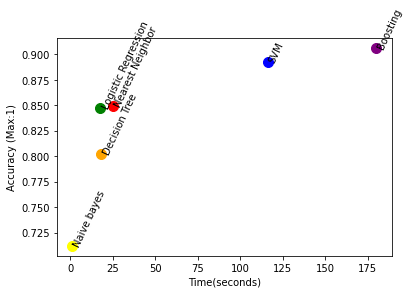

In [ ]:
time_sec = [25.3, 17.7, 1, 18.3, 116, 180]
accuacy = [0.849, 0.847, 0.712, 0.802, 0.8925, 0.906]
annotations=["Nearest Neighbor","Logistic Regression","Naive bayes","Decision Tree","SVM","Boosting"]


plt.scatter(time_sec[0], accuacy[0],s=100,color="red")
plt.scatter(time_sec[1], accuacy[1],s=100,color="green")
plt.scatter(time_sec[2], accuacy[2],s=100,color="yellow")
plt.scatter(time_sec[3], accuacy[3],s=100,color="orange")
plt.scatter(time_sec[4], accuacy[4],s=100,color="blue")
plt.scatter(time_sec[5], accuacy[5],s=100,color="purple")

for i, label in enumerate(annotations):
    plt.text(time_sec[i], accuacy[i],label).set_rotation(65)


plt.xlabel('Time(seconds)')
plt.ylabel('Accuracy (Max:1)')
plt.show()

# Ensemble method

## Random forest

Random forest base case

In [ ]:
%%time
model = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
model.fit(X_train, y_train.values.ravel())
#Predict
y_pred = model.predict(X_test)
#Print result
print(accuracy_score(y_test, y_pred))

0.7355
CPU times: user 6.86 s, sys: 12.5 ms, total: 6.88 s
Wall time: 6.99 s


0.7355
CPU times: user 6.86 s, sys: 12.5 ms, total: 6.88 s
Wall time: 6.99 s

### Best accuracy from Random Forest

In [ ]:
%%time
# random forest
warnings.filterwarnings("ignore")
model = RandomForestClassifier(n_estimators=64, n_jobs=-1) 
model.fit(X_train, y_train)
#Predict
# output = model.predict(X_test)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.8725
CPU times: user 38.7 s, sys: 119 ms, total: 38.8 s
Wall time: 24.4 s


0.8725


CPU times: user 38.7 s, sys: 119 ms, total: 38.8 s

Wall time: 24.4 s

## Bagging

In [ ]:
%%time
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy on test set:")
print(accuracy_score(y_test, y_pred_tree))

Accuracy on test set:
0.7825
CPU times: user 19.6 s, sys: 124 ms, total: 19.7 s
Wall time: 19.8 s


Accuracy on test set:
0.7825

CPU times: user 18.6 s, sys: 3.55 ms, total: 18.6 s

Wall time: 19.1 s

### Bagging with decission tree

In [ ]:
%%time
bag_clf=BaggingClassifier(DecisionTreeClassifier(random_state=rs),
    n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1,
    random_state=rs)
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)
print("Accuracy on test set:")
print(accuracy_score(y_test, y_pred))

Accuracy on test set:
0.7575
CPU times: user 2.02 s, sys: 433 ms, total: 2.46 s
Wall time: 3min 21s


Accuracy on test set:
0.7575

CPU times: user 2.02 s, sys: 433 ms, total: 2.46 s

Wall time: 3min 21s

### Bagging with using svm (Best accuracy)

In [ ]:
%%time

from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
estimator = LinearSVC()
n_estimators = 10
n_jobs = 1
model1 = BaggingClassifier(base_estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)


model1.fit(X_train_norm,y_train)
y_pred1= model1.predict(X_train_norm)

print("Train_accuracy:", model1.score(X_train_norm, y_train))
print("Test_accuracy:", model1.score(X_test_norm, y_test))
# print(accuracy_score(y_test, y_pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Train_accuracy: 0.8610714285714286
Test_accuracy: 0.8325
CPU times: user 1min 1s, sys: 2.12 s, total: 1min 3s
Wall time: 60 s


Train_accuracy: 0.8610714285714286

Test_accuracy: 0.8325

CPU times: user 1min 1s, sys: 2.12 s, total: 1min 3s

Wall time: 60 s

## Boosting

### HistGradientBoostingClassifier

HistGradientBoostingClassifier with original data

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)
print(clf.score(X_test_pca, y_test))

0.867
CPU times: user 3min 32s, sys: 2.45 s, total: 3min 34s
Wall time: 2min 34s


0.867


CPU times: user 3min 32s, sys: 2.45 s, total: 3min 34s

Wall time: 2min 34s

HistGradientBoostingClassifier with original data

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))

0.8895
CPU times: user 5min 41s, sys: 5.17 s, total: 5min 46s
Wall time: 3min


0.8895

CPU times: user 5min 41s, sys: 5.17 s, total: 5min 46s

Wall time: 3min

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train_std, y_train)
clf.score(X_test_std, y_test)
print(clf.score(X_test_std, y_test))

0.8715
CPU times: user 5min 52s, sys: 5.17 s, total: 5min 57s
Wall time: 3min 4s


0.8715

CPU times: user 5min 52s, sys: 5.17 s, total: 5min 57s

Wall time: 3min 4s

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)
print(clf.score(X_test_pca, y_test))

0.871
CPU times: user 2min 39s, sys: 2.38 s, total: 2min 41s
Wall time: 1min 23s


0.871

CPU times: user 2min 39s, sys: 2.38 s, total: 2min 41s

Wall time: 1min 23s

### Adaboost with SGDClassifier

In [ ]:
# adaboost in svm
%%time
from sklearn.linear_model import SGDClassifier
adab_test = AdaBoostClassifier(SGDClassifier(loss='hinge'), algorithm='SAMME')
adab_test.fit(X_train_norm, y_train)
y_pred_ada = adab_test.predict(X_test_norm)

print('Train accuracy',adab_test.score(X_train_norm, y_train))
print('Test accuracy',adab_test.score(X_test_norm, y_test))


Train accuracy 0.7156428571428571

Test accuracy 0.704

CPU times: user 6min 58s, sys: 7.15 s, total: 7min 6s

Wall time: 6min 56s

### Gradient Boosting

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=1, n_estimators=200, learning_rate=0.2, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting - accuracy on test set:")
print(accuracy_score(y_test, y_pred_gb))

Gradient Boosting - accuracy on test set:
0.841
CPU times: user 27min 42s, sys: 912 ms, total: 27min 43s
Wall time: 27min 52s


Gradient Boosting - accuracy on test set:
0.841

CPU times: user 24min 21s, sys: 1.14 s, total: 24min 22s

Wall time: 24min 20s

### LGBMClassifier

In [ ]:
%%time
param_grid=[{'max_depth':[5,10],
           'n_estimators':[100],
           'learning_rate':[0.05,0.1],
           'colsample_bytree':[0.8,0.95]}]
lgb_gs = GridSearchCV(LGBMClassifier(random_state=42), param_grid)
lgb_gs.fit(X_train, y_train)
lgb_gssss = lgb_gs.predict(X_test)
print(accuracy_score(y_test, lgb_gssss))
print("Best parameters: {}".format(lgb_gs.best_params_))

0.8845

CPU times: user 3h 3min 36s, sys: 19.1 s, total: 3h 3min 55s

Wall time: 1h 34min 11s

Best parameters: {'colsample_bytree': 0.95, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

### Best accuracy from Boosting

In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(loss = "categorical_crossentropy", max_leaf_nodes = None,min_samples_leaf = 255,  max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))

0.8915
CPU times: user 9min 28s, sys: 7.73 s, total: 9min 36s
Wall time: 5min 10s


0.8915

CPU times: user 9min 28s, sys: 7.73 s, total: 9min 36s

Wall time: 5min 10s

# Algorithms with the best accuracy is by using **HistGradientBoostingClassifier**

# Appendix

The movement of increase the contrast of the graph. 



## Cover data from 0 ~ 50 to 0 and 200 ~ 255 to 255.

In [ ]:
%%time
for X in range(29999):
    for Y in range(785):
        if int(df_train.iloc[[X],[Y]].values[0]) < 51:
            df_train.iloc[[X],[Y]] = 0
        if int(df_train.iloc[[X],[Y]].values[0]) > 200:
            df_train.iloc[[X],[Y]] = 255
df_train.to_csv('df_train50.csv')

CPU times: user 7h 46min 27s, 

sys: 2min 50s, total: 7h 49min 17s

Wall time: 7h 55min 2s



In [ ]:
for X in range(4999):
    for Y in range(785):
        if int(df_test.iloc[[X],[Y]].values[0]) < 50:
            df_test.iloc[[X],[Y]] = 0
        if int(df_test.iloc[[X],[Y]].values[0]) > 200:
            df_test.iloc[[X],[Y]] = 255
df_test.to_csv('df_test50.csv')

## Cover data from 0 ~ 100 to 0 and 150 ~ 255 to 255.

In [ ]:
%%time
for X in range(29999):
    for Y in range(785):
        if int(df_train.iloc[[X],[Y]].values[0]) < 100:
            df_train.iloc[[X],[Y]] = 0
        if int(df_train.iloc[[X],[Y]].values[0]) > 150:
            df_train.iloc[[X],[Y]] = 255

for X in range(4999):
    for Y in range(785):
        if int(df_test.iloc[[X],[Y]].values[0]) < 100:
            df_test.iloc[[X],[Y]] = 0
        if int(df_test.iloc[[X],[Y]].values[0]) > 150:
            df_test.iloc[[X],[Y]] = 255


df_train.to_csv('df_train100.csv')
df_test.to_csv('df_test100.csv')

CPU times: user 9h 13min 15s, sys: 3min 2s, total: 9h 16min 18s
Wall time: 9h 22min 32s

## To test our code

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing

# from google.colab import drive
# drive.mount('/content/gdrive')


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier ##


In [ ]:
# change to your own path
df_train = pd.read_csv('/content/gdrive/MyDrive/Input/train/train.csv') 
df_test = pd.read_csv('/content/gdrive/MyDrive/Input/test/test_input.csv')

In [ ]:
%%time

X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test


#Original data
sd_train=np.nanstd(X_train)
sd_test=np.nanstd(X_test)
print('Standard deviation of the train dataset: ', sd_train)
print('Standard deviation of the test dataset: ', sd_test)

# Normalization
X_train_norm = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test_norm = preprocessing.MinMaxScaler().fit_transform(X_test)
sd_nor_train=np.nanstd(X_train_norm)
sd_nor_test=np.nanstd(X_test_norm )
print('Standard deviation after normalization of the train dataset: ', sd_nor_train)
print('Standard deviation after normalization of the test dataset: ', sd_nor_test)
# Standardization
X_train_std =StandardScaler().fit_transform(X_train)
X_test_std =StandardScaler().fit_transform(X_test)
sdt_sta_train=np.nanstd(X_train_std )
sdt_sta_test=np.nanstd(X_test_std)
print('Standard deviation after standardization of the train dataset:', sdt_sta_train)
print('Standard deviation after standardization of the test dataset:', sdt_sta_test)
# PCA
#fit by PCA method
pca = PCA(n_components=0.95).fit(X_train_std)
X_train_pca =pca.transform(X_train_std)
X_test_pca =pca.transform(X_test_std)

print("pca train data shape: {}".format(str(X_train_pca.shape)))
print("pca test data shape:: {}".format(str(X_test_pca.shape)))

#check standard devication
sd_pca=np.nanstd(X_train_pca)
print('Standard devication: ', sd_pca)


In [ ]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
# clf.score(X_test, y_test)
output = clf.predict(X_test)

In [ ]:
output

In [ ]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./Output/test_output.csv', sep=",", float_format= '%d', index_label = "id")

# try

0.876
CPU times: user 5min 44s, sys: 4.45 s, total: 5min 49s
Wall time: 3min 13s


ha
random_state= 3
0.881
______________________________________
random_state= 1
0.876
______________________________________
random_state= 2
0.883
______________________________________
random_state= 3
0.881
______________________________________
random_state= 4
0.882
______________________________________
random_state= 5
0.881
______________________________________
random_state= 6
0.8855
______________________________________
random_state= 7
0.8895
______________________________________
random_state= 8
0.878
______________________________________
random_state= 9
0.8835
______________________________________
random_state= 10
0.8845
______________________________________
random_state= 11
0.8735
______________________________________
random_state= 12
0.885
______________________________________
random_state= 13
0.881
______________________________________
random_state= 14
0.886
______________________________________
random_state= 15
0.8835
______________________________________
random_st

KeyboardInterrupt: ignored